In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [105]:
#data salju train
datatrain = pd.read_csv('salju_train.csv')
datatrain.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


#1. Explorasi Dataset 

In [106]:
print(datatrain.shape)
print(type(datatrain))

(109095, 24)
<class 'pandas.core.frame.DataFrame'>


Dataset salju_train memiliki 24 atribut dan 109095 baris data.

In [107]:
datatrain['BersaljuBesok'].value_counts()

Tidak    82701
Ya       23963
Name: BersaljuBesok, dtype: int64

In [108]:
datatrain.dtypes

id                            int64
Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

Untuk Class 'BersaljuBesok', terdapat 23963 data yang 'Ya' dan 82701 yang 'Tidak'.

#2. Mengatasi Missing Values

In [109]:
#mengecek ada data null
datatrain.isnull().sum()

id                              0
Tanggal                         0
KodeLokasi                      0
SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
ArahAngin9am                 7923
ArahAngin3pm                 3197
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
BersaljuHariIni              2431
BersaljuBesok                2431
dtype: int64

Bisa terlihat terdapat banyak sekali data null untuk data numerikal dan kategorikal. 

Untuk mengatasi missing value untuk data numerikal, dataset harus diketahui apakah dataset tersebut skewed atau tidak. Skewness merupakan teknik pengukuran apabila distribusi tiap data simetrik atau tidak. Jika rentan nilai skewness berada di antara 2 dan -2, maka dipakailah mean. Jika tidak, dipakailah median

In [110]:
#melihat apakah data tersebut skew
datatrain.skew(axis=0, skipna=True)

id                           0.000000
SuhuMin                      0.018027
SuhuMax                      0.220794
Hujan                       10.059372
Penguapan                    3.916398
SinarMatahari               -0.493987
KecepatanAnginTerkencang     0.875967
KecepatanAngin9am            0.783795
KecepatanAngin3pm            0.622092
Kelembaban9am               -0.481203
Kelembaban3pm                0.033181
Tekanan9am                  -0.098483
Tekanan3pm                  -0.049309
Awan9am                     -0.230423
Awan3pm                     -0.227323
Suhu9am                      0.085140
Suhu3pm                      0.238056
dtype: float64

Karena adanya beberapa atribut yang mempunyai nilai skewness diatas 2, berarti metode yang akan dipakai untuk missing values adalah median

In [111]:
#mengatasi missing values dengan median
datatrain.fillna(datatrain.median(), inplace=True)

Setelah menangani data numerik, sekarang mengatasi missing value di data kategorik. Untuk data kategorik, akan digunakan library SimpleImpute

In [112]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
datatrain = pd.DataFrame(imputer.fit_transform(datatrain))

In [113]:
datatrain.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64

In [114]:
#mengganti nama kolom
datatrain = datatrain.set_axis(['id', 'Tanggal', 'KodeLokasi', 'SuhuMin', 'SuhuMax', 'Hujan',
                                'Penguapan', 'SinarMatahari', 'ArahAnginTerkencang',
                                'KecepatanAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm',
                                'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am',
                                'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm',
                                'Suhu9am', 'Suhu3pm', 'BersaljuHariIni', 'BersaljuBesok'], axis=1, inplace=False)


In [115]:
datatrain.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,4.8,8.4,WSW,24,N,WSW,0,13,78,76,1020.1,1018.5,5,5,13.1,15,Ya,Tidak
1,2,15/07/2014,C10,9,17,8,2.6,7.4,W,39,SW,WNW,13,20,80,61,1015.2,1014.6,7,5,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32,0,4.8,8.4,ESE,44,SE,SE,15,26,62,42,1017.6,1015.2,5,5,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0,8.4,10.4,SSW,54,N,SW,13,19,25,17,1019.2,1016.9,1,7,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0,3.6,12.6,N,37,NNW,ESE,22,19,55,48,1019.7,1014.7,2,6,12.4,18.1,Tidak,Tidak


In [116]:
datatrain.drop(['id'], axis=1)

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,01/06/2014,C4,10.4,15.5,4.8,4.8,8.4,WSW,24,N,WSW,0,13,78,76,1020.1,1018.5,5,5,13.1,15,Ya,Tidak
1,15/07/2014,C10,9,17,8,2.6,7.4,W,39,SW,WNW,13,20,80,61,1015.2,1014.6,7,5,11.9,15.5,Ya,Ya
2,16/02/2011,C46,18.2,32,0,4.8,8.4,ESE,44,SE,SE,15,26,62,42,1017.6,1015.2,5,5,23.8,29.6,Tidak,Tidak
3,08/08/2012,C36,7.3,24.5,0,8.4,10.4,SSW,54,N,SW,13,19,25,17,1019.2,1016.9,1,7,15.3,23.2,Tidak,Tidak
4,29/10/2016,C7,5.9,20.3,0,3.6,12.6,N,37,NNW,ESE,22,19,55,48,1019.7,1014.7,2,6,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,31/01/2009,C38,20.1,23.7,0,7.2,8.9,ESE,43,SE,ESE,24,26,74,70,1019.3,1017.6,4,6,22,22.1,Tidak,Ya
109091,03/11/2010,C16,15.7,25.2,0,4.8,8.4,SSE,37,SSE,E,28,19,52,52,1018.4,1016.2,5,5,23.8,24.4,Tidak,Ya
109092,11/11/2010,C17,7.5,20.4,1.6,4.8,8.4,NW,33,N,NW,4,13,92,51,1014.5,1010.6,5,5,12.6,19.8,Ya,Tidak
109093,16/04/2012,C11,10.8,29.8,0,7.8,11.2,E,48,ESE,SE,13,26,35,18,1020,1015.8,0,1,21.7,29.2,Tidak,Tidak


#3. Memisahkan dataset dengan target variabel

In [117]:
#meng-assign X untuk semua kolom kecuali 'BersaljuBesok' dan y untuk kolom 'BersaljuBesok'
X = datatrain.drop(['BersaljuBesok'], axis=1)
y = datatrain['BersaljuBesok']

Setelah memisahkan variable independen dari variable dependen (y), selanjutnya adalah memsplit data menjadi X_train, X_test, y_train, dan y_test dengan test sizenya 0.3

In [118]:
#split data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape, X_test.shape

((76366, 23), (32729, 23))

Setelah membagi data, selanjutnya adalah meng-encode data kategorik menjadi tipe data yang sama supaya bisa dikomputasi.

In [119]:
encoder = ce.OrdinalEncoder(cols=['Tanggal', 'KodeLokasi', 'SuhuMin', 'SuhuMax', 'Hujan',
                                  'Penguapan', 'SinarMatahari', 'ArahAnginTerkencang',
                                  'KecepatanAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm',
                                  'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am',
                                  'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm',
                                  'Suhu9am', 'Suhu3pm', 'BersaljuHariIni'])

#meng-assign hasil encoder kedalan X_train dan X_test
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [120]:
X_train.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni
29108,29109,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
51190,51191,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
74144,74145,3,3,3,3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1
96571,96572,4,4,4,4,1,4,4,3,1,4,4,4,4,4,4,4,4,4,4,4,4,1
105617,105618,5,5,5,5,2,5,1,4,4,5,5,1,5,5,5,5,5,5,2,5,5,1


In [121]:
X_train.drop(['id','Tanggal'], axis=1)

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni
29108,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
51190,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
74144,3,3,3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1
96571,4,4,4,1,4,4,3,1,4,4,4,4,4,4,4,4,4,4,4,4,1
105617,5,5,5,2,5,1,4,4,5,5,1,5,5,5,5,5,5,2,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44411,37,205,71,11,39,32,8,5,14,9,4,12,60,41,353,307,6,1,46,44,2
93635,42,233,200,1,9,1,4,8,10,10,1,6,20,6,41,76,6,1,237,367,1
47577,35,151,393,1,9,1,11,4,8,10,16,11,28,72,17,18,6,1,365,394,1
14076,47,18,118,1,9,1,1,12,11,6,10,3,6,70,103,31,6,9,156,180,1


In [122]:
X_test.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni
60966,60967,2087.0,38,126.0,175.0,1.0,34.0,2,5,21.0,3,10,9.0,5.0,46,46,62.0,87.0,8,4,80.0,85.0,1
32794,32795,2114.0,37,123.0,130.0,1.0,29.0,105,8,1.0,9,6,17.0,12.0,37,22,82.0,146.0,4,3,85.0,17.0,1
97705,97706,1714.0,38,97.0,150.0,2.0,9.0,28,14,2.0,6,5,5.0,20.0,59,11,211.0,89.0,2,1,97.0,193.0,1
75502,75503,1351.0,8,133.0,39.0,1.0,61.0,12,7,2.0,5,9,13.0,7.0,48,7,186.0,196.0,6,1,170.0,9.0,1
54739,54740,1718.0,46,192.0,101.0,9.0,9.0,1,15,14.0,8,10,17.0,20.0,7,8,31.0,6.0,6,1,205.0,44.0,2


In [123]:
X_test.drop(['id','Tanggal'], axis=1)

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni
60966,38,126.0,175.0,1.0,34.0,2,5,21.0,3,10,9.0,5.0,46,46,62.0,87.0,8,4,80.0,85.0,1
32794,37,123.0,130.0,1.0,29.0,105,8,1.0,9,6,17.0,12.0,37,22,82.0,146.0,4,3,85.0,17.0,1
97705,38,97.0,150.0,2.0,9.0,28,14,2.0,6,5,5.0,20.0,59,11,211.0,89.0,2,1,97.0,193.0,1
75502,8,133.0,39.0,1.0,61.0,12,7,2.0,5,9,13.0,7.0,48,7,186.0,196.0,6,1,170.0,9.0,1
54739,46,192.0,101.0,9.0,9.0,1,15,14.0,8,10,17.0,20.0,7,8,31.0,6.0,6,1,205.0,44.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89971,9,82.0,36.0,71.0,33.0,93,4,9.0,5,2,7.0,14.0,12,21,123.0,148.0,4,8,68.0,79.0,2
98151,42,145.0,166.0,1.0,29.0,6,6,21.0,5,6,5.0,11.0,14,41,160.0,98.0,8,9,124.0,78.0,1
14051,38,236.0,68.0,1.0,40.0,59,13,28.0,7,11,21.0,19.0,14,47,135.0,315.0,4,9,104.0,98.0,1
86845,30,211.0,183.0,1.0,23.0,111,14,8.0,16,13,2.0,3.0,51,74,78.0,148.0,9,3,43.0,72.0,1


#4. KNN

In [124]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

#memasuki class ke dalam data
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [125]:
#membuat variabel y prediksi
y_pred_knn = classifier.predict(X_test)

In [126]:
#membuat confusion matrix dan Precision, Recall, F1-Score, Support

print("----Confusion Matrix-----")
print(confusion_matrix(y_test, y_pred_knn))
print("")
print("----Precision, Recall, F1-Score, Support-----")
print(classification_report(y_test, y_pred_knn))

----Confusion Matrix-----
[[24070  1476]
 [ 6706   477]]

----Precision, Recall, F1-Score, Support-----
              precision    recall  f1-score   support

       Tidak       0.78      0.94      0.85     25546
          Ya       0.24      0.07      0.10      7183

    accuracy                           0.75     32729
   macro avg       0.51      0.50      0.48     32729
weighted avg       0.66      0.75      0.69     32729



In [127]:
#menghitung akurasi model knn
from sklearn.metrics import accuracy_score
print('Akurasi Model: {0:0.4f}'. format(accuracy_score(y_test, y_pred_knn)*100), "%")

Akurasi Model: 75.0008 %


In [128]:
y_pred_train_knn = classifier.predict(X_train)

#akurasi training set
print('Akurasi Traing set: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_knn)*100), "%")

Akurasi Traing set: 80.3931 %


Hasil yang dapat diperoleh dari model KNN tersebut adalah akurasi model KNN dengan 75.1% dan akurasi training set dengan 80.4%. Meski hasil ini masih tinggi, namun masih kurang memuaskan. Alasan mengapa hasil-hasil tersebut tidak melampaui 80% karena KNN tidak bekerja dengan kinerja yang tinggi. 

Untuk menutupi kekurangan dari algoritma KNN, model selanjutnya yang akan dianalisis dan dibanding adalah algoritma Random Forest dan Decision Tree.

#5. Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [130]:
y_pred_rf = forest.predict(X_test)

In [131]:
y_pred_train_rf = forest.predict(X_train)

In [132]:
print('Akurasi Model: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)*100), "%")
print('Akurasi Traing set: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_rf)*100), "%")

Akurasi Model: 81.9060 %
Akurasi Traing set: 99.9987 %


Hasil yang diperoleh dari algoritma Random Forest adalah akurasi model dengan 82.1% dan akurasi training set dengan 99.9%.

#6. Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [134]:
y_pred_dt = tree.predict(X_test)
y_pred_train_dt = tree.predict(X_train)

In [135]:
print('Akurasi Model: {0:0.4f}'. format(accuracy_score(y_test, y_pred_dt)*100), "%")
print('Akurasi Traing set: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_dt)*100), "%")

Akurasi Model: 73.8305 %
Akurasi Traing set: 100.0000 %


Hasil yang diperoleh dari algoritma Decision Tree adalah akurasi model dengan 73.5% dan akurasi training set dengan 100%.

#7. Kesimpulan

Dari hasil akurasi 3 algoritma classifier tersebut, maka dapat disimpulkan bahwa algoritma Random Forest merupakan algoritma yang mempunyai akurasi model dan akurasi training set yang cukup memuaskan, meskipun akurasi training set dari algoritma Decision Tree adalah 100%. Alasan yang dapat disimpulkan adalah karena Algoritma Random Forest mempunyai kinerja yang tinggi untuk dataset yang berjumlah banyak.

Meskipun akurasi training set dari algoritma Decision Tree adalah 100%, akurasi model yang dicapai adalah 74.5%. Ini membuktikan bahwa selain KNN, Decision Tree tidak berkinerja tinggi dengan dataset yang berjumlah banyak.

#8. Export Data2

In [136]:
#dataset knn

In [137]:
y_pred_knn = pd.DataFrame(y_pred_knn)

In [138]:
y_pred_knn.to_csv('y_pred_knn.csv')

In [139]:
y_pred_train_knn = pd.DataFrame(y_pred_train_knn)

In [140]:
y_pred_train_knn.to_csv('y_pred_train_knn.csv')

In [141]:
#dataset random forest

In [142]:
y_pred_rf = pd.DataFrame(y_pred_rf)

In [143]:
y_pred_rf.to_csv('y_pred_rf.csv')

In [144]:
y_pred_train_rf = pd.DataFrame(y_pred_train_rf)

In [145]:
y_pred_train_rf.to_csv('y_pred_train_rf.csv')

In [146]:
#dataset decision tree

In [147]:
y_pred_dt = pd.DataFrame(y_pred_dt)

In [148]:
y_pred_dt.to_csv('y_pred_dt.csv')

In [149]:
y_pred_train_dt = pd.DataFrame(y_pred_train_dt)

In [150]:
y_pred_train_dt.to_csv('y_pred_train_dt.csv')

#8. Graph 

In [152]:
akurasi_model_knn = accuracy_score(y_test, y_pred_knn)*100
akurasi_model_rf = accuracy_score(y_test, y_pred_rf)*100
akurasi_model_dt = accuracy_score(y_test, y_pred_dt)*100

akurasi_trainset_knn = accuracy_score(y_train, y_pred_train_knn)*100
akurasi_trainset_rf = accuracy_score(y_train, y_pred_train_rf)*100
akurasi_trainset_dt = accuracy_score(y_train, y_pred_train_dt)*100

Text(0, 0.5, 'Akurasi (%)')

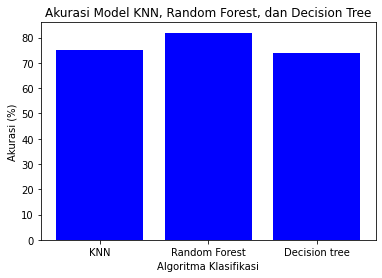

In [162]:
#graph 

algoritma = ['KNN','Random Forest','Decision tree']
model = (akurasi_model_knn, akurasi_model_rf, akurasi_model_dt)
trainset = (akurasi_trainset_knn, akurasi_trainset_rf, akurasi_trainset_dt)

plt.bar(algoritma, model, color='blue')
plt.title('Akurasi Model KNN, Random Forest, dan Decision Tree')
plt.xlabel('Algoritma Klasifikasi')
plt.ylabel('Akurasi (%)')

Text(0, 0.5, 'Akurasi (%)')

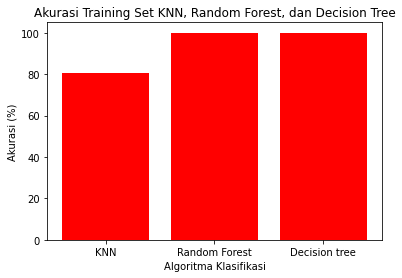

In [161]:
plt.bar(algoritma, trainset, color='red')
plt.title('Akurasi Training Set KNN, Random Forest, dan Decision Tree')
plt.xlabel('Algoritma Klasifikasi')
plt.ylabel('Akurasi (%)')